In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import pathlib
import os

from helper_functions import *
metadata = pd.read_csv("metadata.csv")
metadata_cfdna = metadata[metadata["Sample type"].isin(["cfDNA", "Control"])]
import warnings
warnings.filterwarnings("ignore")
import random
outputdir = "./outputdir_02102023"

topK = 500
atlas_sample_types = "Tissue,WBC"

outputdir = "./outputdir_02102023"
# outputdir = "outputdir_23102023_hypo_hyper"

path_to_03_output = os.path.join(outputdir, "03_output_noFDR")
path_to_04_output = os.path.join(outputdir, "04_output_noFDR", "top{}_{}".format(topK, atlas_sample_types.replace(",", "_and_")))
path_to_05_output = os.path.join(outputdir, "05_output_noFDR", "top{}_{}".format(topK, atlas_sample_types.replace(",", "_and_")))

loyferdf = pd.read_csv("/datassd/hieunho/UXM/201023_cfDNA_highdepth/ready-to-use/custom_cell.csv")
print(loyferdf.CellType)
loyferdf = loyferdf.set_index("CellType").T.reset_index()
loyferdf["WBC"] = loyferdf[[item for item in loyferdf.columns if "Blood" in item] + ["Megakaryocytes"]].apply(lambda x: sum(x), axis = 1)
loyferdf["Liver"] = loyferdf[[item for item in loyferdf.columns if "Liver" in item]].apply(lambda x: sum(x), axis = 1)
loyferdf["Breast"] = loyferdf[[item for item in loyferdf.columns if "Breast" in item]].apply(lambda x: sum(x), axis = 1)
loyferdf["Lung"] = loyferdf[[item for item in loyferdf.columns if "Lung" in item]].apply(lambda x: sum(x), axis = 1)
loyferdf["CRC"] = loyferdf[[item for item in loyferdf.columns if "Colon" in item]].apply(lambda x: sum(x), axis = 1)
loyferdf["Gastric"] = loyferdf[[item for item in loyferdf.columns if "Gastric" in item]].apply(lambda x: sum(x), axis = 1)

loyferdf = loyferdf[["index", "Liver", "Breast", "Gastric", "Lung", "CRC", "WBC"]].copy()

loyferdf["index"] = loyferdf["index"].apply(lambda x: x.split("_change")[0])
loyferdf.columns = ["Sample"] + list(loyferdf.columns)[1:]
df = pd.read_csv(os.path.join(path_to_05_output, "deconvo_res_cfdna.csv"), index_col = [0])
df = df.set_index("TOO").T.reset_index()

df.columns = ["Sample"] + list(df.columns)[1:]

0       Breast-Basal-Ep
1     Breast-Luminal-Ep
2              Colon-Ep
3            Gastric-Ep
4             Liver-Hep
5         Lung-Ep-Alveo
6          Lung-Ep-Bron
7               Blood-B
8          Blood-Granul
9      Blood-Mono+Macro
10             Blood-NK
11              Blood-T
12       Megakaryocytes
Name: CellType, dtype: object


In [2]:
loyferdf["prediction"] = loyferdf[["Liver", "Breast", "Gastric", "Lung", "CRC"]].apply(
    lambda x: ["Liver", "Breast", "Gastric", "Lung", "CRC"][list(x).index(max(x))], axis = 1
)
loyferdf["Label"] = loyferdf["Sample"].apply(lambda x: metadata_cfdna[metadata_cfdna["filename"] == x]["Label"].unique()[0])
loyferdf = loyferdf[loyferdf["Label"] != "Control"]

In [3]:
path_to_data_rplot = "/datassd/hieunguyen/ECD/tumor_atlas_official/data_for_Rplot"

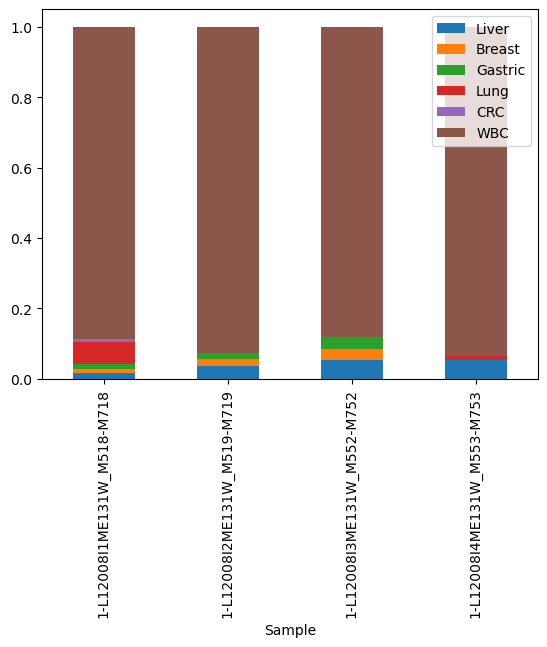

In [4]:
##### DECONVOLUTION OF THE REAL SAMPLES
loyferdf[loyferdf["Sample"].str.contains("L12008I")].set_index("Sample").plot(kind = "bar", stacked = True)
loyferdf[loyferdf["Sample"].str.contains("L12008I")].to_csv(os.path.join(path_to_data_rplot, "Figure2_L12008I_Loyfer_atlas.csv"))

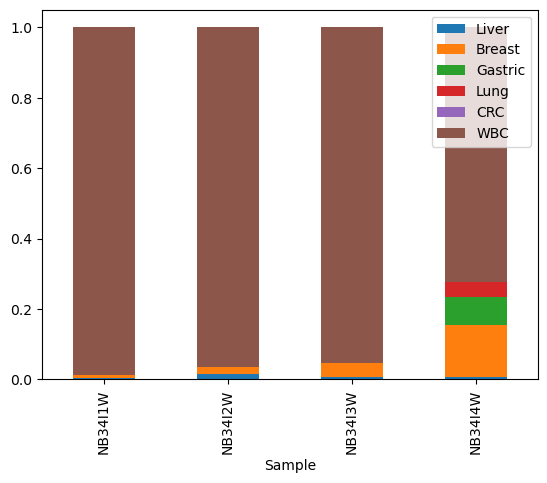

In [5]:
##### DECONVOLUTION OF THE REAL SAMPLES
loyferdf[loyferdf["Sample"].str.contains("NB34I")].set_index("Sample").plot(kind = "bar", stacked = True)
loyferdf[loyferdf["Sample"].str.contains("NB34I")].to_csv(os.path.join(path_to_data_rplot, "Figure2_NB34I_Loyfer_atlas.csv"))

In [6]:
loyferdf["check"] = loyferdf[["prediction", "Label"]].apply(lambda x: "correct" if x[0] == x[1] else "incorrect" , axis = 1)

In [7]:
loyferdf.groupby(["check"]).count()

,Sample,Liver,Breast,Gastric,Lung,CRC,WBC,prediction,Label
check,,,,,,,,,
correct,16,16,16,16,16,16,16,16,16
incorrect,32,32,32,32,32,32,32,32,32


In [8]:
loyferdf.to_csv(os.path.join(path_to_data_rplot, "figure4_full_loyfer_deconvo.csv"))